# Introduction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/My Drive/'
final_movie_data = pd.read_csv(working_dir_path + 'rotten_tomatoes_rating_movies_cleaned_and_imdb_movies_cleaned_year_and_title_vise.csv')
final_movie_data.describe()
final_movie_data
final_movie_data['duration'] = final_movie_data['duration'].astype(int)
final_movie_data.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,movie_title,genres,tomatometer_rating,year,duration,country,language,imdb_score,worldwide_gross_income
7143,Zoolander,"Comedy, Special Interest",64.0,2001,90,"Germany, USA",English,65.0,0.006078
7144,Zoolander 2,Comedy,22.0,2016,101,"USA, Italy","English, Italian, Spanish",47.0,0.005672
7145,Zoom,"Action & Adventure, Comedy, Kids & Family",4.0,2006,93,USA,English,44.0,0.001251
7146,Zoot Suit,"Drama, Musical & Performing Arts",56.0,1981,103,USA,English,68.0,0.000326
7147,Zootopia,"Action & Adventure, Animation, Comedy",98.0,2016,108,USA,English,80.0,0.102379


In [ ]:
final_movie_data = final_movie_data.fillna(0)

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             7148 non-null   object 
 1   genres                  7148 non-null   object 
 2   tomatometer_rating      7148 non-null   float64
 3   year                    7148 non-null   int64  
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7148 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 502.7+ KB


# **Audience preference analysis**

The goal of this analysis is to analyse the likes and dislikes of the audience or atleast check how their preference signals (imdb and rotten tomatoes ratings) are impacted by other dimension of a movie.

We will be breaking this analysis into 5 points as shown below


1. **Rating preference across year released** - are old movies liked more or newer movies are liked more

2. **Rating preference across language** - Comparison of audience preference across langauges

3. **Rating prefernece across duration** - long duation movies are liked or disliked

## 1.Rating preference across year
 

In [ ]:
# Groupby year and find the median of imdb_score and tomatometer_rating based on year
imdb_rotten_rating_year =final_movie_data.groupby('year')['imdb_score', 'tomatometer_rating'].median().reset_index()

<ipython-input-13-09d1ef871d1f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  imdb_rotten_rating_year =final_movie_data.groupby('year')['imdb_score', 'tomatometer_rating'].median().reset_index()


In [ ]:
imdb_rotten_rating_year

,year,imdb_score,tomatometer_rating
0,1921,83.0,100.0
1,1923,70.0,92.0
2,1925,82.0,100.0
3,1927,81.0,97.0
4,1928,81.0,96.0
...,...,...,...
90,2016,62.0,56.5
91,2017,62.5,56.0
92,2018,61.0,60.0
93,2019,62.0,58.0


Plot Line graph with twinx feature of above data


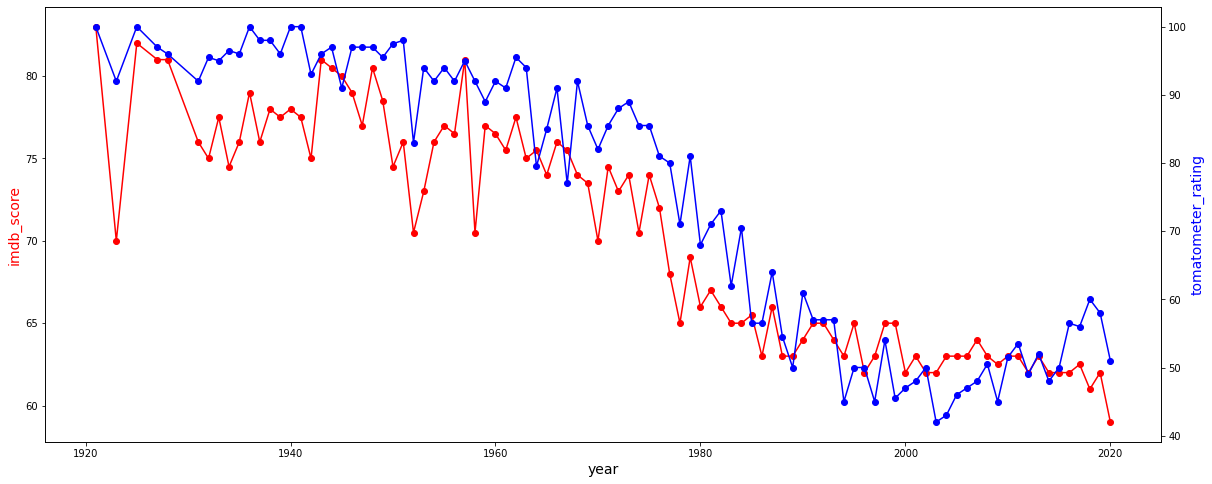

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20,8))
# make a plot
ax.plot(imdb_rotten_rating_year.year, imdb_rotten_rating_year.imdb_score, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("imdb_score",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(imdb_rotten_rating_year.year, imdb_rotten_rating_year["tomatometer_rating"],color="blue",marker="o")
ax2.set_ylabel("tomatometer_rating",color="blue",fontsize=14)
plt.show()

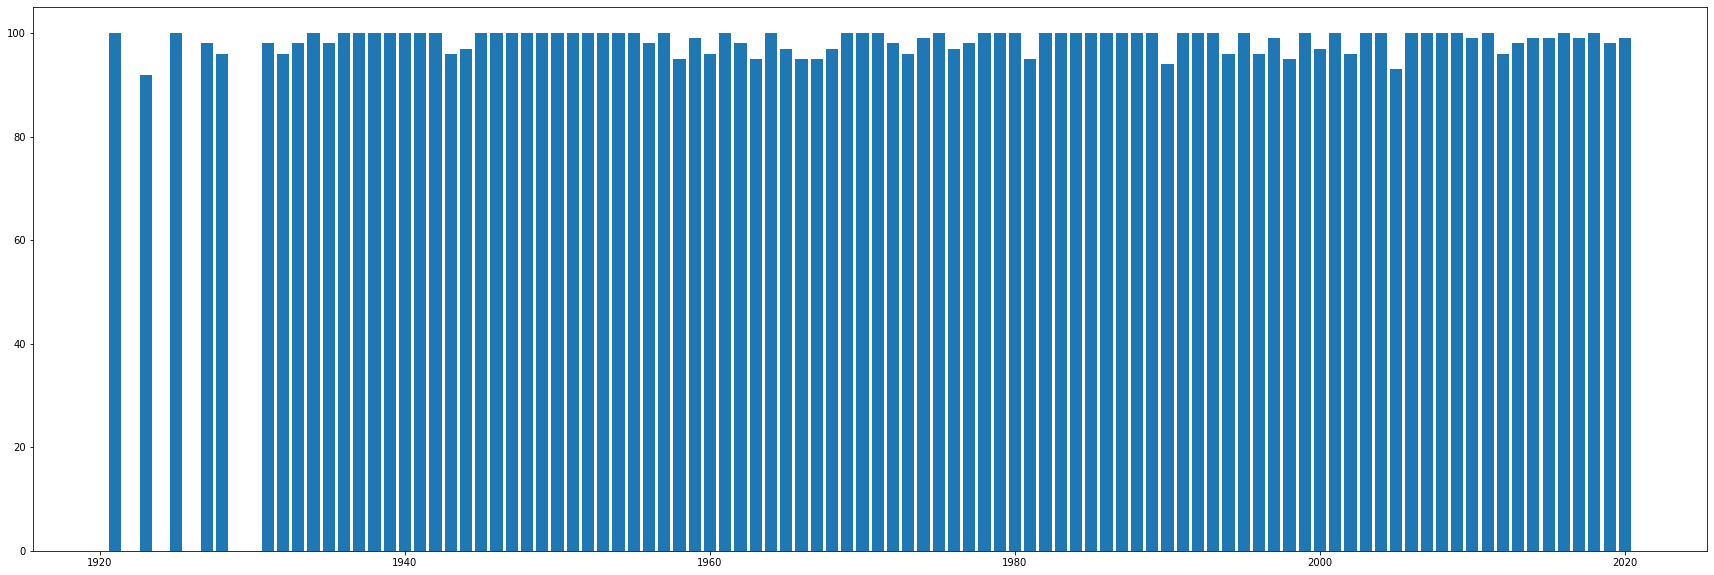

In [ ]:
earning_potential_and_rating_comparision = final_movie_data[['year','tomatometer_rating','imdb_score']]
earning_potential_and_rating_comparision_tr = earning_potential_and_rating_comparision['tomatometer_rating'] 
x = earning_potential_and_rating_comparision['year']
earning_potential_and_rating_comparision_ir = earning_potential_and_rating_comparision['imdb_score']
plt.figure(figsize=(30,10))
plt.bar(x,earning_potential_and_rating_comparision_tr);

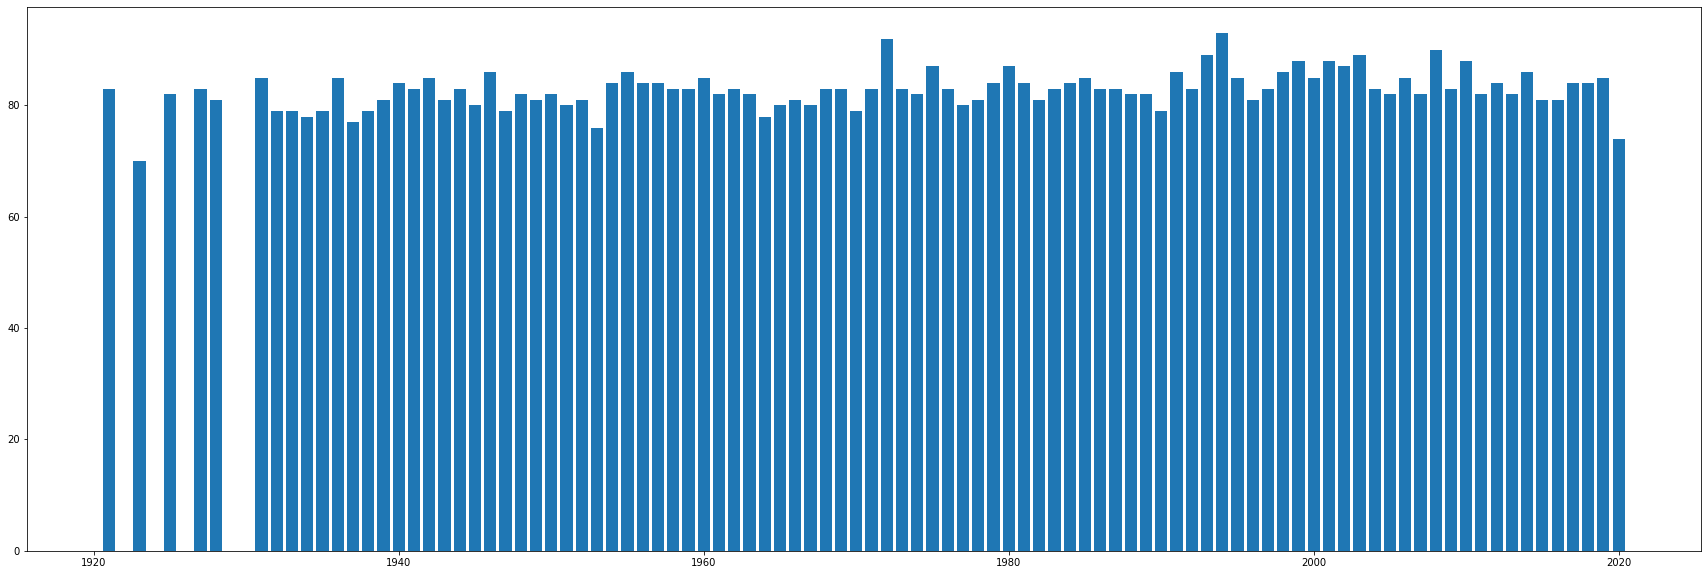

In [ ]:
earning_potential_and_rating_comparision_ir = earning_potential_and_rating_comparision['imdb_score']
plt.figure(figsize=(30,10))
plt.bar(x,earning_potential_and_rating_comparision_ir);


plot scatter graph of above data


**Analysis Point**

1. As times goes on the tomatometer rating declined as compared to imdb_score  and vice versa.
2. The imdb_score almost constant after year 1980, which lies between in the range of 60 -70.
3. The tomatometer rating increses slightly after year 2000.  

imdb_rotten_rating_genre =final_movie_data.groupby('genres')['imdb_score', 'tomatometer_rating'].median.reset_index()

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             7148 non-null   object 
 1   genres                  7148 non-null   object 
 2   tomatometer_rating      7148 non-null   float64
 3   year                    7148 non-null   int64  
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7148 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 502.7+ KB


## 2.Rating preference across duration


In [ ]:
# Create dataset for 'duration','imdb_score','tomatometer_rating'
duration_rating = imdb_rotten_genre_explode[['duration','imdb_score','tomatometer_rating']]
duration_rating

NameError: ignored

In [ ]:
# Drop duplicate rows 
duration_rating.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Plot scatter graph for selected data for duration with tomatometer rating and imdb_score 

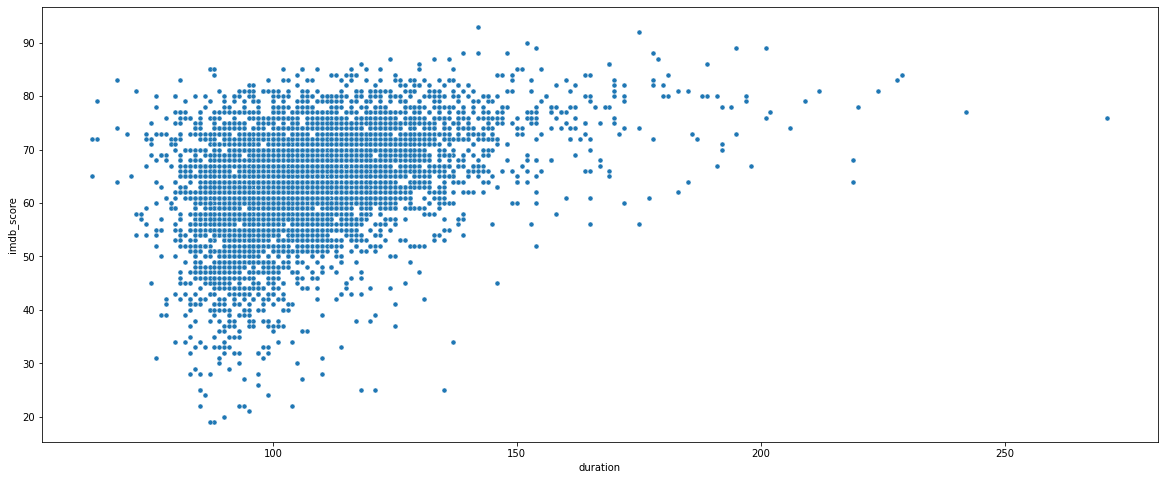

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='duration', y='imdb_score', data = duration_rating, s=25);


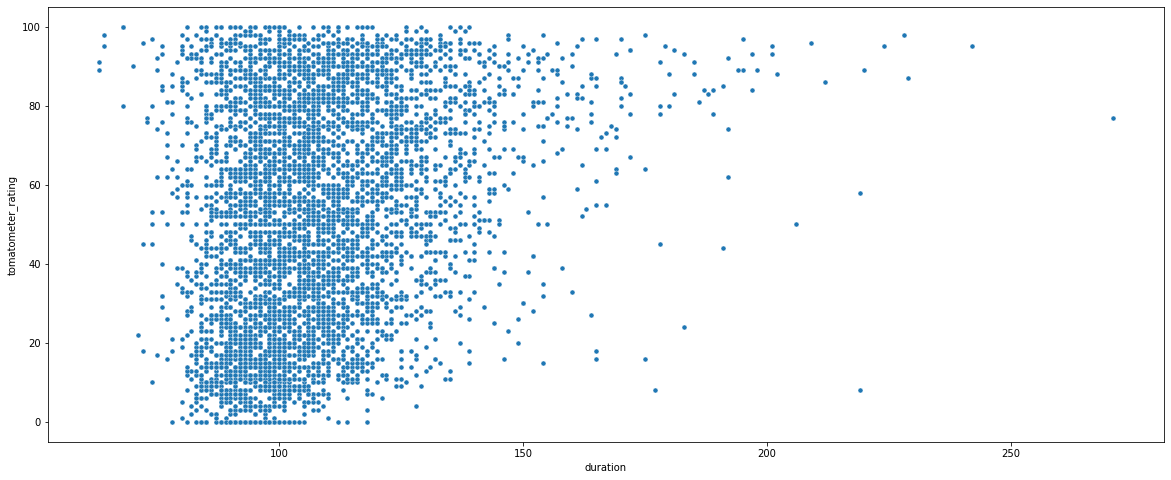

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='duration', y='tomatometer_rating', data = duration_rating, s=25);

Not such insight can drawn from above plots 
so let's see any insight can drawn by correlation between them.

In [ ]:
duration_rating_correlation = duration_rating.corr()

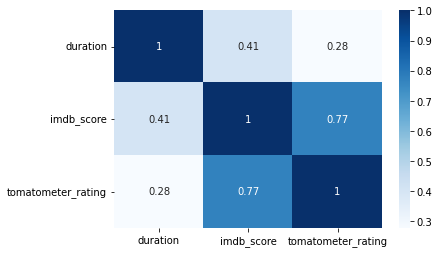

In [ ]:
sns.heatmap(duration_rating_correlation, annot=True, cmap='Blues')

**Analysis Point**

From correlation matrix it is observed that the duration is not highly correlated with imdb score and tomatometer rating

Now plot correlation matrix between them

In [ ]:
correlation_yr_budget_income = yr_budget_income.corr()

In [ ]:
correlation_yr_budget_income

,year,budget,worldwide_gross_income
year,1.000000,0.281196,0.200861
budget,0.281196,1.000000,0.737768
worldwide_gross_income,0.200861,0.737768,1.000000


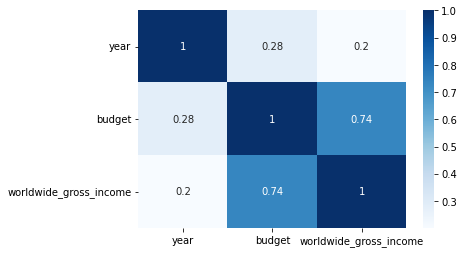

In [ ]:
sns.heatmap(correlation_yr_budget_income, annot=True, cmap='Blues')

**Analysis Point**

1. As we can see from above scatter plots, over the years the budget increases hence the gross income also increases.
2. And it is also seen from the correlation matrix that budget and gross income highly correlated with coefficient of 0.74 .

## 3.Rating preference across language

In [ ]:
# create dataframe with selected column 'language','imdb_score','tomatometer_rating'
rating_language = imdb_rotten_genre_explode[['language','imdb_score','tomatometer_rating']]
# Drop Duplicates rows 
rating_language.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Explode the col language and remove duplicates rows
rating_language['language'] = rating_language.apply(lambda row:convert_list(row['language']),axis=1)
rating_language = rating_language.explode('language') 
rating_language.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Drop rows having language col none values
rating_language.drop(rating_language.loc[rating_language.language == 'None'].index, inplace=True)

In [ ]:
# Check the values of language col 
print(rating_language.language.unique())
print(rating_language.language.nunique())

['English' 'Hungarian' 'Latin' 'German' 'French' 'Italian' 'Russian'
 'Arabic' 'Esperanto' 'Spanish' 'Swahili' 'American Sign Language'
 'Japanese' 'Thai' 'Portuguese' 'Turkish' 'Welsh' 'Chinese'
 'Scottish Gaelic' 'Greek' 'Ancient (to 1453)' 'Yiddish' 'Hebrew'
 'Cantonese' 'Kurdish' 'Swedish' 'Irish' 'Navajo' 'Dutch' 'Polish' 'Hindi'
 'Vietnamese' 'Sindarin' 'Maltese' 'Romanian' 'Icelandic' 'Klingon'
 'Afrikaans' 'Ungwatsi' 'Serbo-Croatian' 'Ukrainian' 'Persian' 'Nepali'
 'Finnish' 'Filipino' 'Norwegian' 'Sinhalese' 'Khmer' 'Maori' 'Mandarin'
 'Guarani' 'Shanghainese' 'Czech' 'Slovak' 'Dari' 'Pushto'
 'Assyrian Neo-Aramaic' 'Spanish Sign Language' 'Korean'
 'Brazilian Sign Language' 'Lao' 'Aboriginal' 'Hawaiian'
 'North American Indian' 'Sioux' 'Inuktitut' 'British Sign Language'
 'Cornish' 'Xhosa' 'Zulu' 'Egyptian (Ancient)' 'Cree' 'Algonquin'
 'Serbian' 'Indonesian' 'Danish' 'Mende' 'Malay' 'Bosnian' 'Croatian'
 'Tibetan' 'Norse' 'Old' 'Tok Pisin' 'Albanian' 'Ojibwa' 'Washoe'
 'Papi

Their are 136 languages in which movies are released we can not plot all languages in one graph, so we have to restrict it for particular languages.

 So we have to select the 'English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean' languages

In [ ]:
rating_language= rating_language.loc[rating_language.language.isin(['English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean'])]

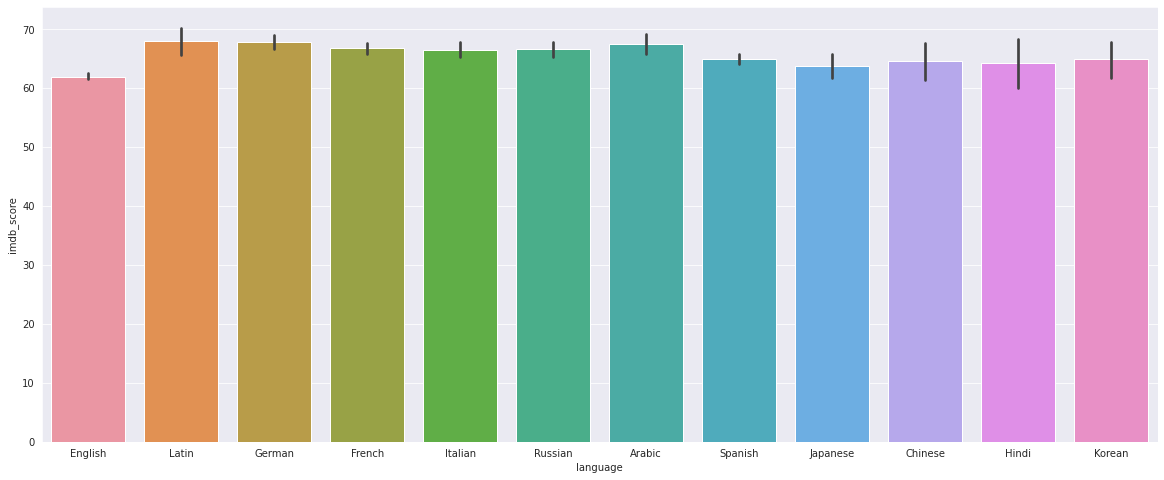

In [ ]:
plt.figure(figsize= (20,8))
sns.barplot(x='language', y='imdb_score',  data= rating_language );

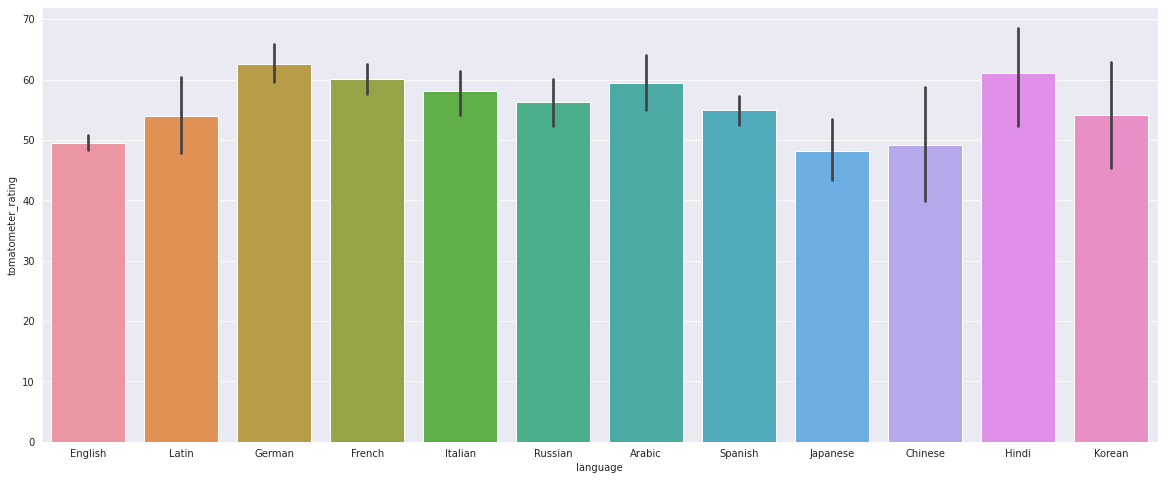

In [ ]:
plt.figure(figsize= (20,8))
sns.barplot(x='language', y='tomatometer_rating',  data= rating_language );

**Analysis Point**

1. Their is not such significant change in imdb score with languages but one insight is observed that English language has lowest rating as compared to other languages.
2. Their is much variation seen in the tomatometer rating as compared to imdb score with languages, in which German language has highest tomatometer rating followed by hindi while japanese has lowest tomatomete rating

# Movies earning potential analysis

## 1.Earning potential of movies
- analyse worldwide gross income column or distribution of worldwide gross income column

In [ ]:
earrning_potential_analysis = final_movie_data['worldwide_gross_income']

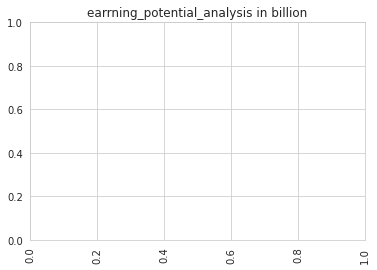

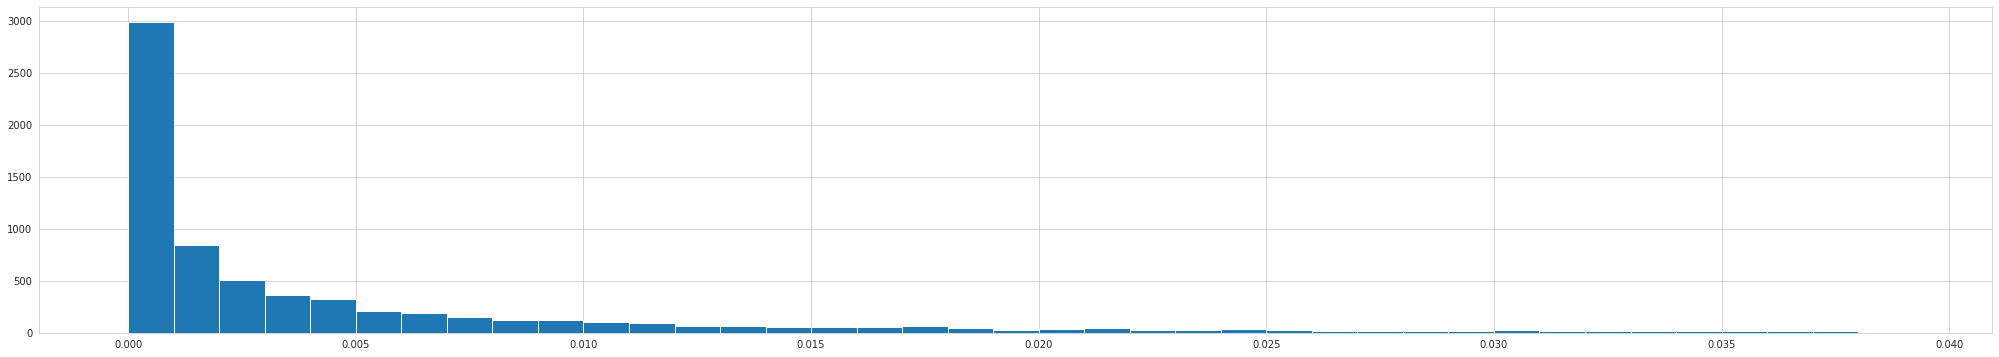

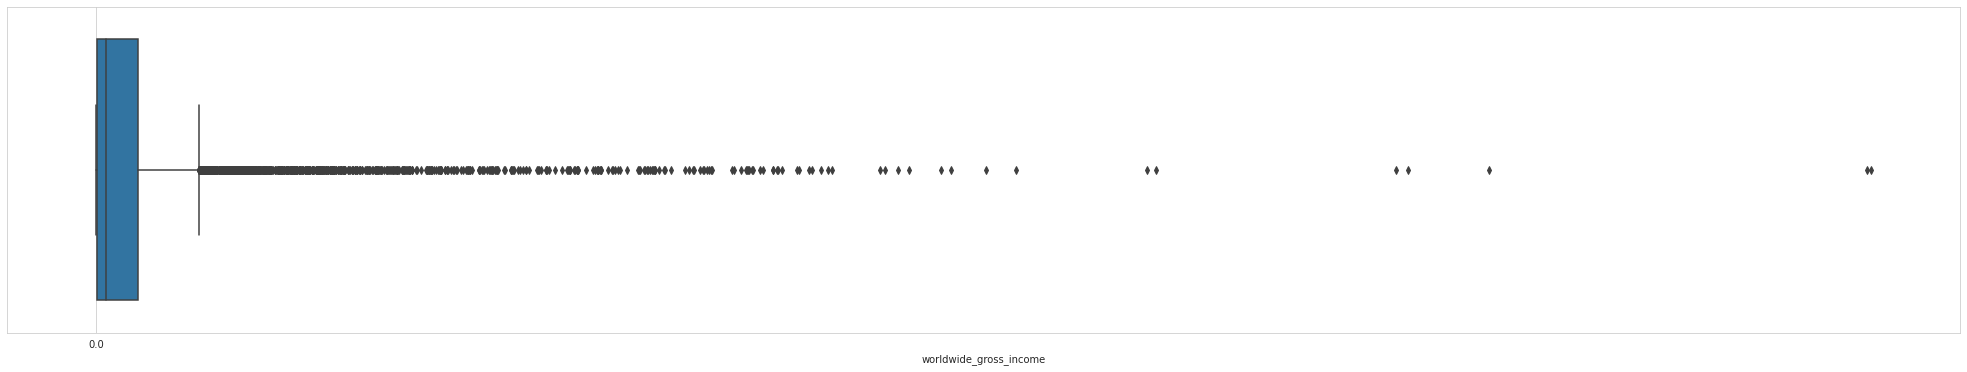

In [ ]:
plt.title("earrning_potential_analysis in billion")
plt.xticks(rotation = 'vertical')
plt.figure(figsize=(35,6))
plt.hist(earrning_potential_analysis, bins=np.arange(0, 0.04, 0.001));
plt.figure(figsize=(35,6))

plt.xticks(np.arange(0,2,0.5))
sns.boxplot(x='worldwide_gross_income',data = final_movie_data);


Analysis:-
1 most movie income 0.000 to 0.001 (in billion) approximatly 3000 movies.
2. highest  income movies are outliers in box plot.
3 more than 500 movies under the category of 0.001 to 0.002 (in billions)
4 mostly movies are occured between 0.001 to 0.010 (in billions)

## 2.Earning potential and Rating Comparison
-  does movies with higher rating have higher earning potential


In [ ]:
earning_potential_and_imdb_rating_comparision_grp = earning_potential_and_rating_comparision.groupby('imdb_score')['worldwide_gross_income'].mean().reset_index();
earning_potential_and_tomatometer_rating_comparision_grp = earning_potential_and_rating_comparision.groupby('tomatometer_rating')['worldwide_gross_income'].mean().reset_index();

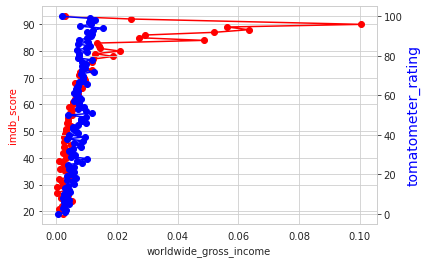

<Figure size 2160x720 with 0 Axes>

In [ ]:
#create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(earning_potential_and_imdb_rating_comparision_grp.worldwide_gross_income, earning_potential_and_imdb_rating_comparision_grp.imdb_score, color="red", marker="o")
# set x-axis label
ax.set_xlabel("worldwide_gross_income")
# set y-axis label
ax.set_ylabel("imdb_score",color="red")
# twin object for two different y-axis on the sample plot     
plt.figure(figsize=(30,10))

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(earning_potential_and_tomatometer_rating_comparision_grp.worldwide_gross_income, earning_potential_and_tomatometer_rating_comparision_grp["tomatometer_rating"],color="blue",marker="o")
ax2.set_ylabel("tomatometer_rating",color="blue",fontsize=14)
plt.show()


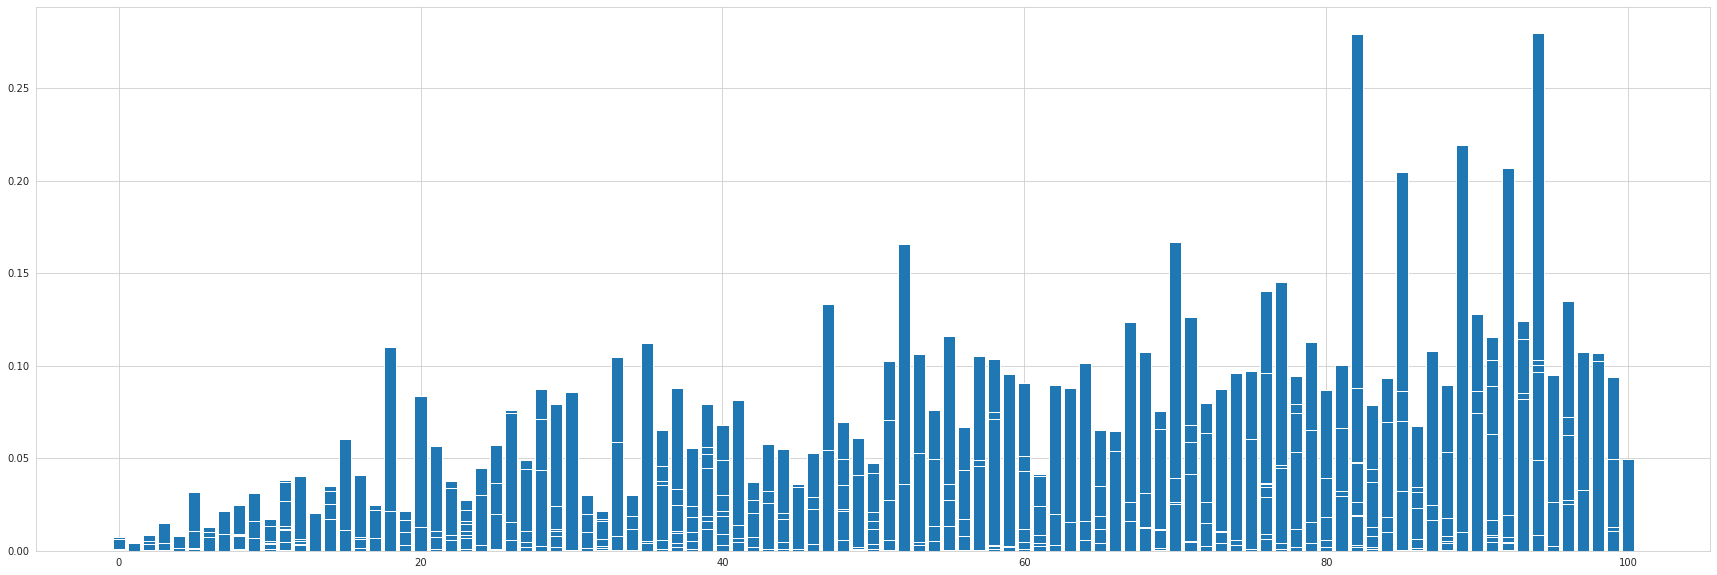

In [ ]:
earning_potential_and_rating_comparision = final_movie_data[['worldwide_gross_income','tomatometer_rating','imdb_score']]
plt.figure(figsize=(30,10))
earning_potential_and_rating_comparision1 = earning_potential_and_rating_comparision['tomatometer_rating'] 
earning_potential_and_rating_comparision3 = earning_potential_and_rating_comparision['worldwide_gross_income']
earning_potential_and_rating_comparision2 = earning_potential_and_rating_comparision['imdb_score']
plt.bar( earning_potential_and_rating_comparision1,earning_potential_and_rating_comparision3);

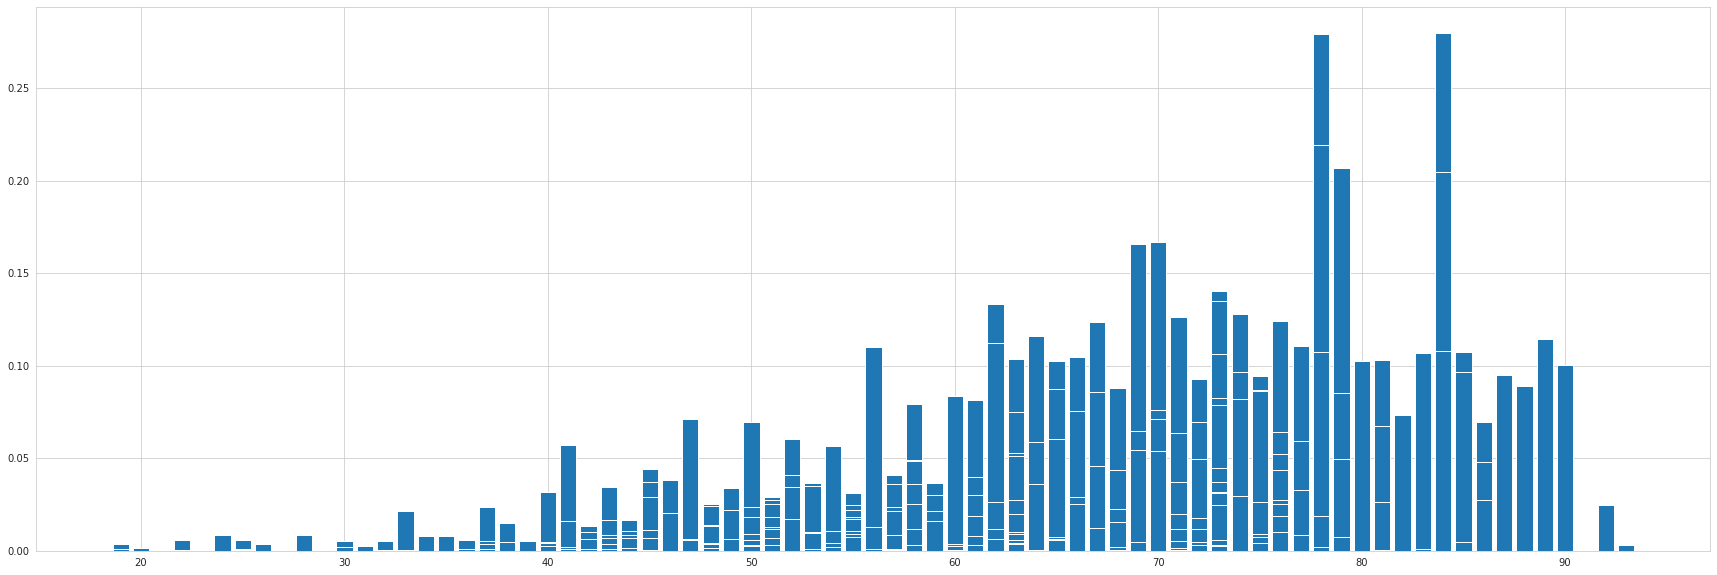

In [ ]:
plt.figure(figsize=(30,10))
plt.bar( earning_potential_and_rating_comparision2,earning_potential_and_rating_comparision3);

Analysis :- 1. Imdb and tomato rating will give higher rating,and simultaneously have worldwide gross income(75 to approximately 90 rating shows higher length of the bar.)
2. tomato meter reding give very strict rating because its a critic rating.
3 60 to 80 rating (both tomato meter rating and imdb ) shows average income(worldwide gross income)

##3.Earning potential and Genre Comparison 
- does genre affect the earning of a movie

In [ ]:
# Create dataset with features imdb_rotten_genre_explode and remove duplicate rows
genre_income = imdb_rotten_genre_explode[['genre_list', 'worldwide_gross_income']].copy()
genre_income.drop_duplicates(inplace=True)

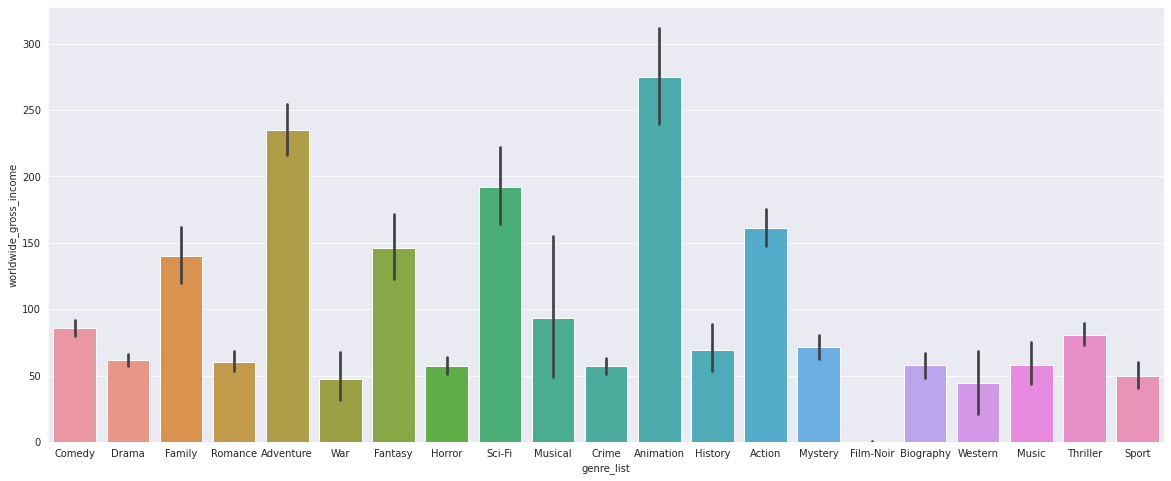

In [ ]:
# plot bar graph for above data
plt.figure(figsize=(20,8))
sns.barplot(x='genre_list', y='worldwide_gross_income', data=genre_income);

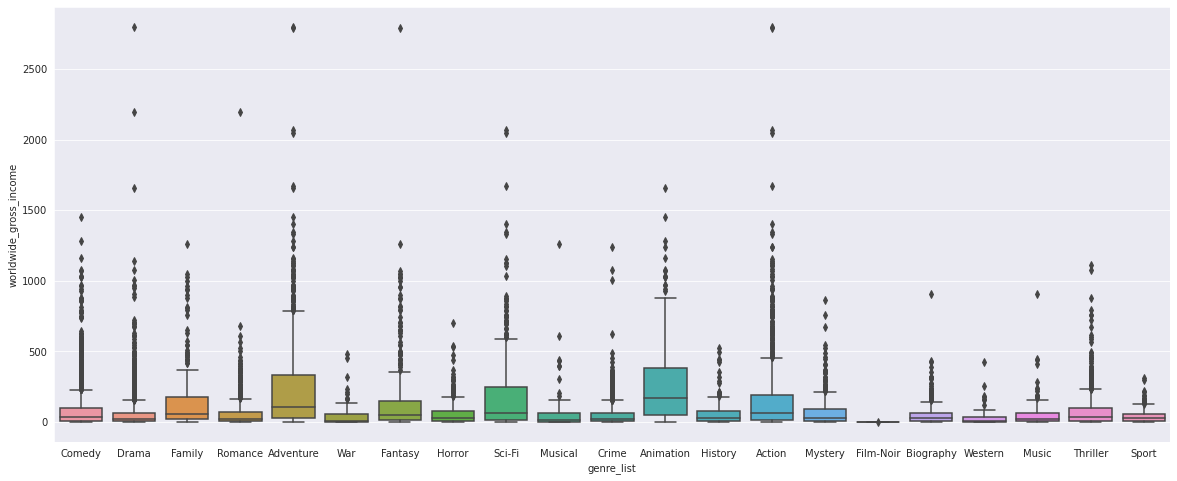

In [ ]:
# plot box graph for above data
plt.figure(figsize=(20,8))
sns.boxplot(x='genre_list', y='worldwide_gross_income', data=genre_income);

**Analysis point**

1. From the bar plot it is clearly observed that animation genre movies earned higher than other genres and also have less outliers as seen in box plot. 
2. After animation genre, the adventure movies have high world gross income but it has too much heavy outliers in it as seen in box plot.
3. Genre film-noir has the lowest earning, this is because this genre is obslette nowdays.

## 4.Earning potential and country Comparison
does the earning of a movie differ based on the country it is getting released into.

In [ ]:
# create dataset with feature 'country','worldwide_gross_income' then explode country col and drop duplicates
country_income= imdb_rotten_genre_explode[['country','worldwide_gross_income']].copy()
country_income['country'] = country_income.apply(lambda row:convert_list(row['country']),axis=1)
country_income = country_income.explode('country') 
country_income.drop_duplicates(inplace=True)

In [ ]:
# find the number of unique values in country
print(country_income.country.unique())
print(country_income.country.nunique())

['USA' 'France' 'Mexico' 'UK' 'Switzerland' 'Italy' 'Hong Kong' 'Ireland'
 'Canada' 'Soviet Union' 'Japan' 'Spain' 'West Germany' 'Australia'
 'Netherlands' 'South Africa' 'Botswana' 'India' 'New Zealand'
 'Czechoslovakia' 'Norway' 'Yugoslavia' 'Israel' 'Sweden' 'Germany'
 'Denmark' 'China' 'Taiwan' 'Argentina' 'Austria' 'Poland' 'Hungary'
 'Belgium' 'Federal Republic of Yugoslavia' 'Bulgaria' 'Czech Republic'
 'Romania' 'Morocco' 'Aruba' 'Luxembourg' 'South Korea' 'Jamaica'
 'Finland' 'Iceland' 'Malta' 'Isle Of Man' 'United Arab Emirates'
 'Uruguay' 'Brazil' 'Thailand' 'Turkey' 'Russia' 'Bahamas' 'Philippines'
 'Kenya' 'Colombia' 'Ecuador' 'Afghanistan' 'Cayman Islands' 'Palestine'
 'Croatia' 'Bosnia and Herzegovina' 'Slovakia' 'Tunisia' 'Slovenia'
 'Lithuania' 'Jordan' 'Ukraine' 'Saudi Arabia' 'Singapore' 'Guatemala'
 'Portugal' 'Serbia' 'Chile' 'Indonesia' 'Panama' 'Malaysia' 'Cambodia'
 'Puerto Rico' 'Greece' 'Monaco']
81


Since the number of country is 81 so we restricted it to selected countries'USA', 'France', 'Mexico', 'UK', 'Italy', 'Japan', 'Spain', 'Australia', 'South Africa', 'India', 'Germany', 'China','Russia'.

In [ ]:
country_income= country_income.loc[country_income.country.isin(['USA', 'France', 'Mexico', 'UK', 'Italy', 'Japan', 'Spain', 'Australia', 'South Africa', 'India', 'Germany', 'China','Russia'])]

Plot the bar plot and box plot 

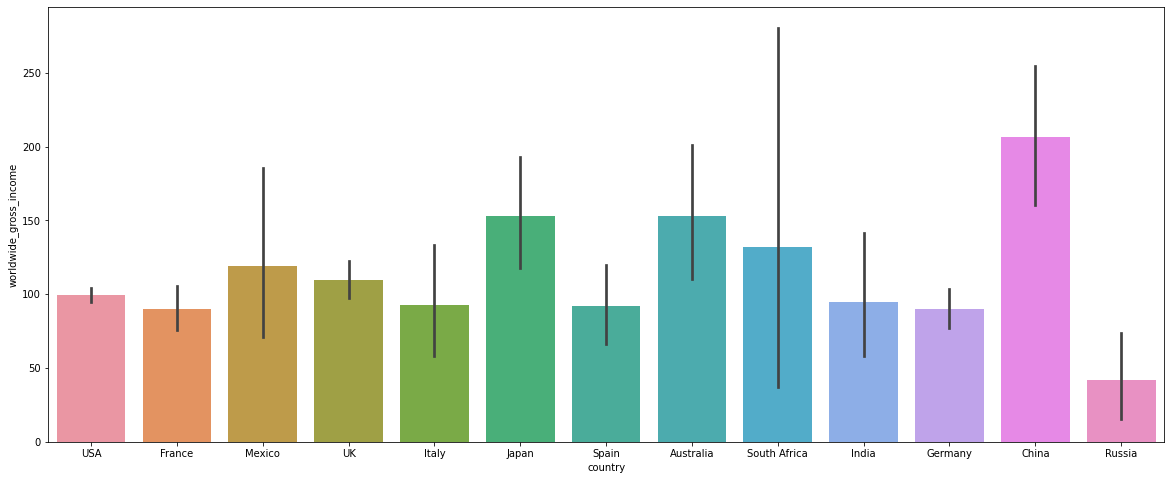

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='country', y='worldwide_gross_income', data=country_income);

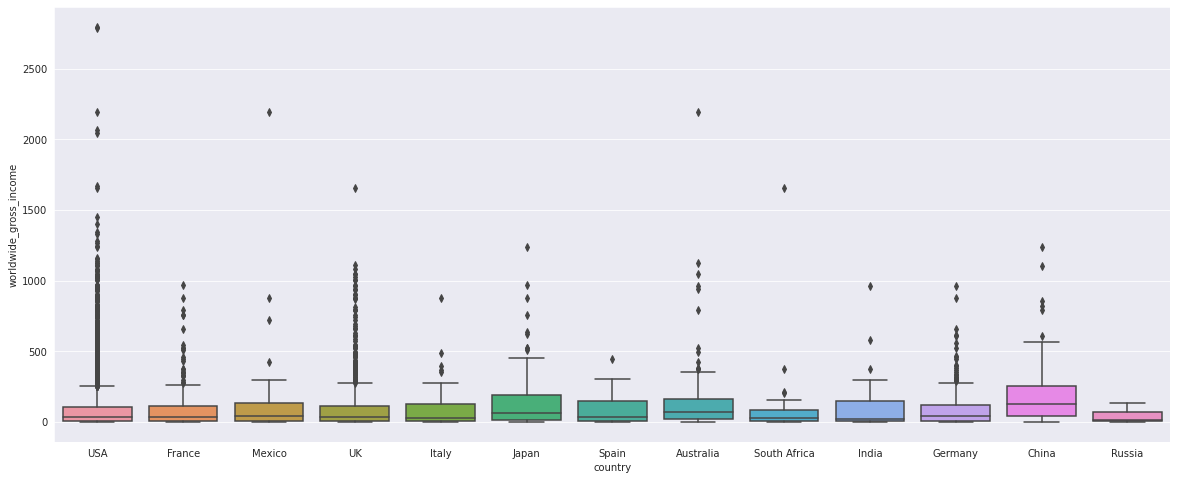

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='country', y='worldwide_gross_income', data=country_income);

**Analysis Point**

1. China has the highest gross income with some outliers followed by japan.
2. USA has the maximum outliers while russia has minimum outliers.

##5.Earning potential and language Comparison


In [ ]:
earning_potential_and_language_potential = final_movie_data[['language','worldwide_gross_income']]

In [ ]:
rating_prefreance_across_language_remove_nan = earning_potential_and_language_potential.dropna(axis=0)

In [ ]:
rating_prefreance_across_language_remove_nan

,language,worldwide_gross_income
0,"English, Greek, Ancient (to 1453)",0.022650
1,English,0.000431
2,English,0.007487
3,English,0.000005
4,English,0.003208
...,...,...
7143,English,0.006078
7144,"English, Italian, Spanish",0.005672
7145,English,0.001251
7146,English,0.000326


In [ ]:
def convert_language_list(language):
  split_language = language.split(',')
  remove_spaces_language_list = [x.strip() for x in split_language]
  return remove_spaces_language_list

In [ ]:
rating_prefreance_across_language_remove_nan['language_list'] = rating_prefreance_across_language_remove_nan.apply(lambda row:convert_language_list(row['language']),axis=1)
rating_prefreance_across_language_remove_nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,language,worldwide_gross_income,language_list
0,"English, Greek, Ancient (to 1453)",0.022650,"[English, Greek, Ancient (to 1453)]"
1,English,0.000431,[English]
2,English,0.007487,[English]
3,English,0.000005,[English]
4,English,0.003208,[English]
...,...,...,...
7143,English,0.006078,[English]
7144,"English, Italian, Spanish",0.005672,"[English, Italian, Spanish]"
7145,English,0.001251,[English]
7146,English,0.000326,[English]


In [ ]:
rating_prefreance_across_language_remove_nan.drop(['language'],axis=1,inplace=True)
rating_prefreance_across_language_remove_nan_explode = rating_prefreance_across_language_remove_nan.explode('language_list') 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
rating_prefreance_across_language_remove_nan_explode

,worldwide_gross_income,language_list
0,0.022650,English
0,0.022650,Greek
0,0.022650,Ancient (to 1453)
1,0.000431,English
2,0.007487,English
...,...,...
7144,0.005672,Italian
7144,0.005672,Spanish
7145,0.001251,English
7146,0.000326,English


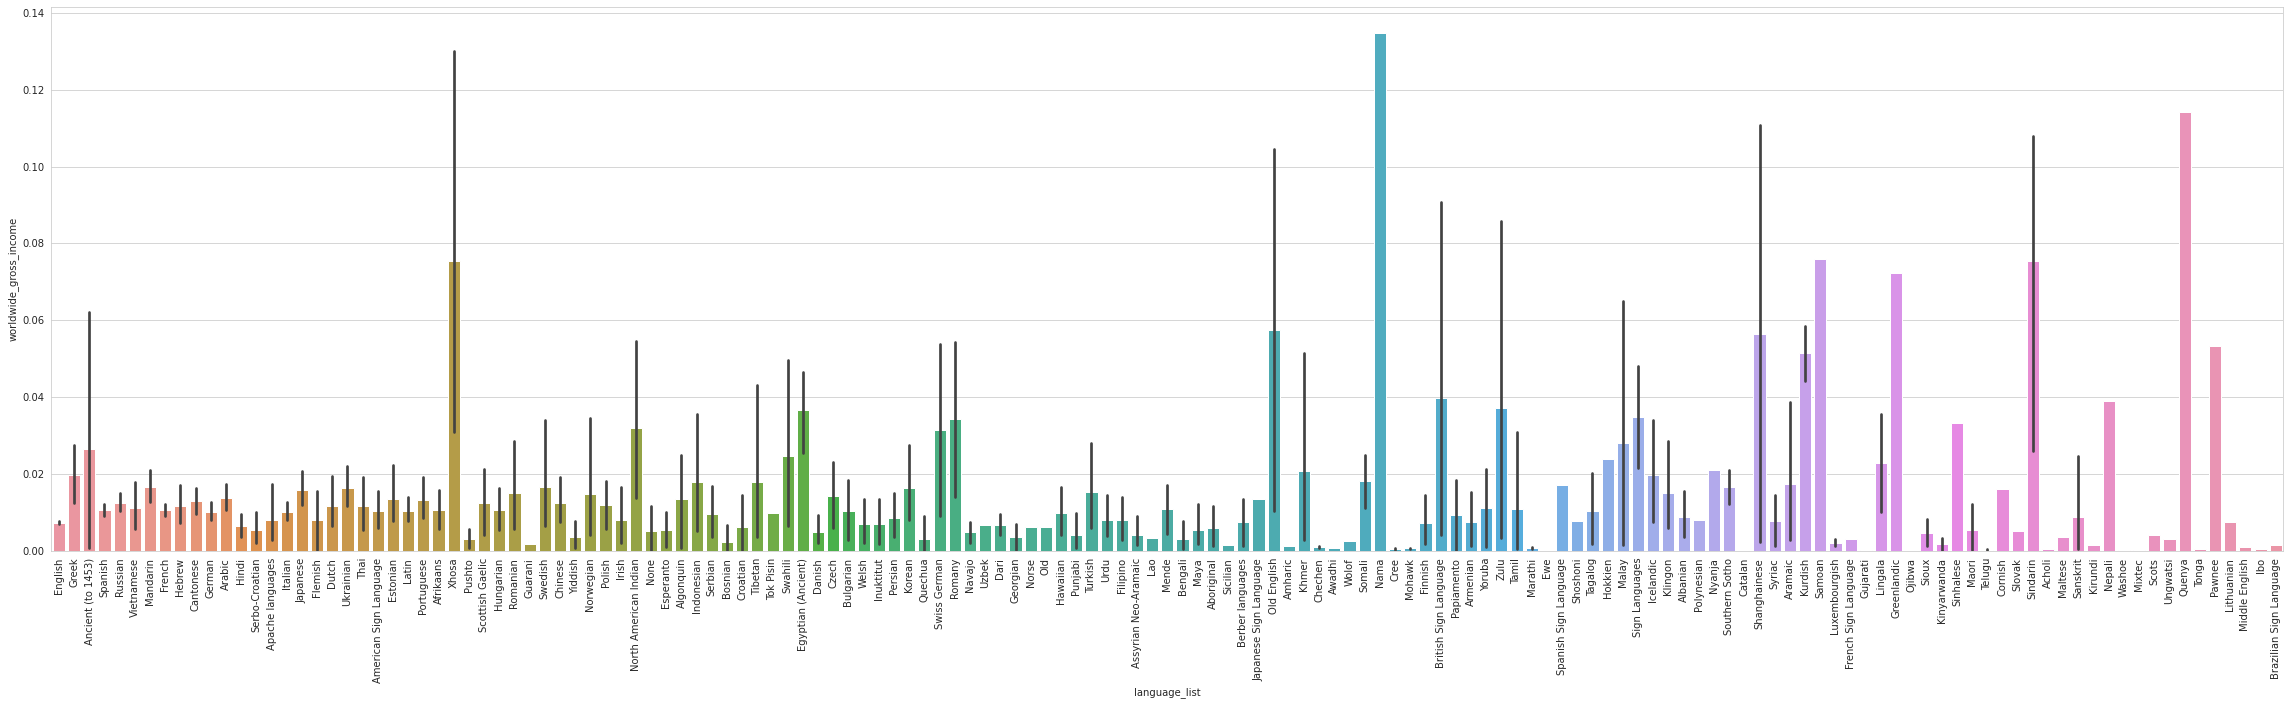

In [ ]:
plt.figure(figsize=(40,10))
plt.xticks(rotation = 'vertical')
sns.barplot(x='language_list', y='worldwide_gross_income', data=rating_prefreance_across_language_remove_nan_explode);


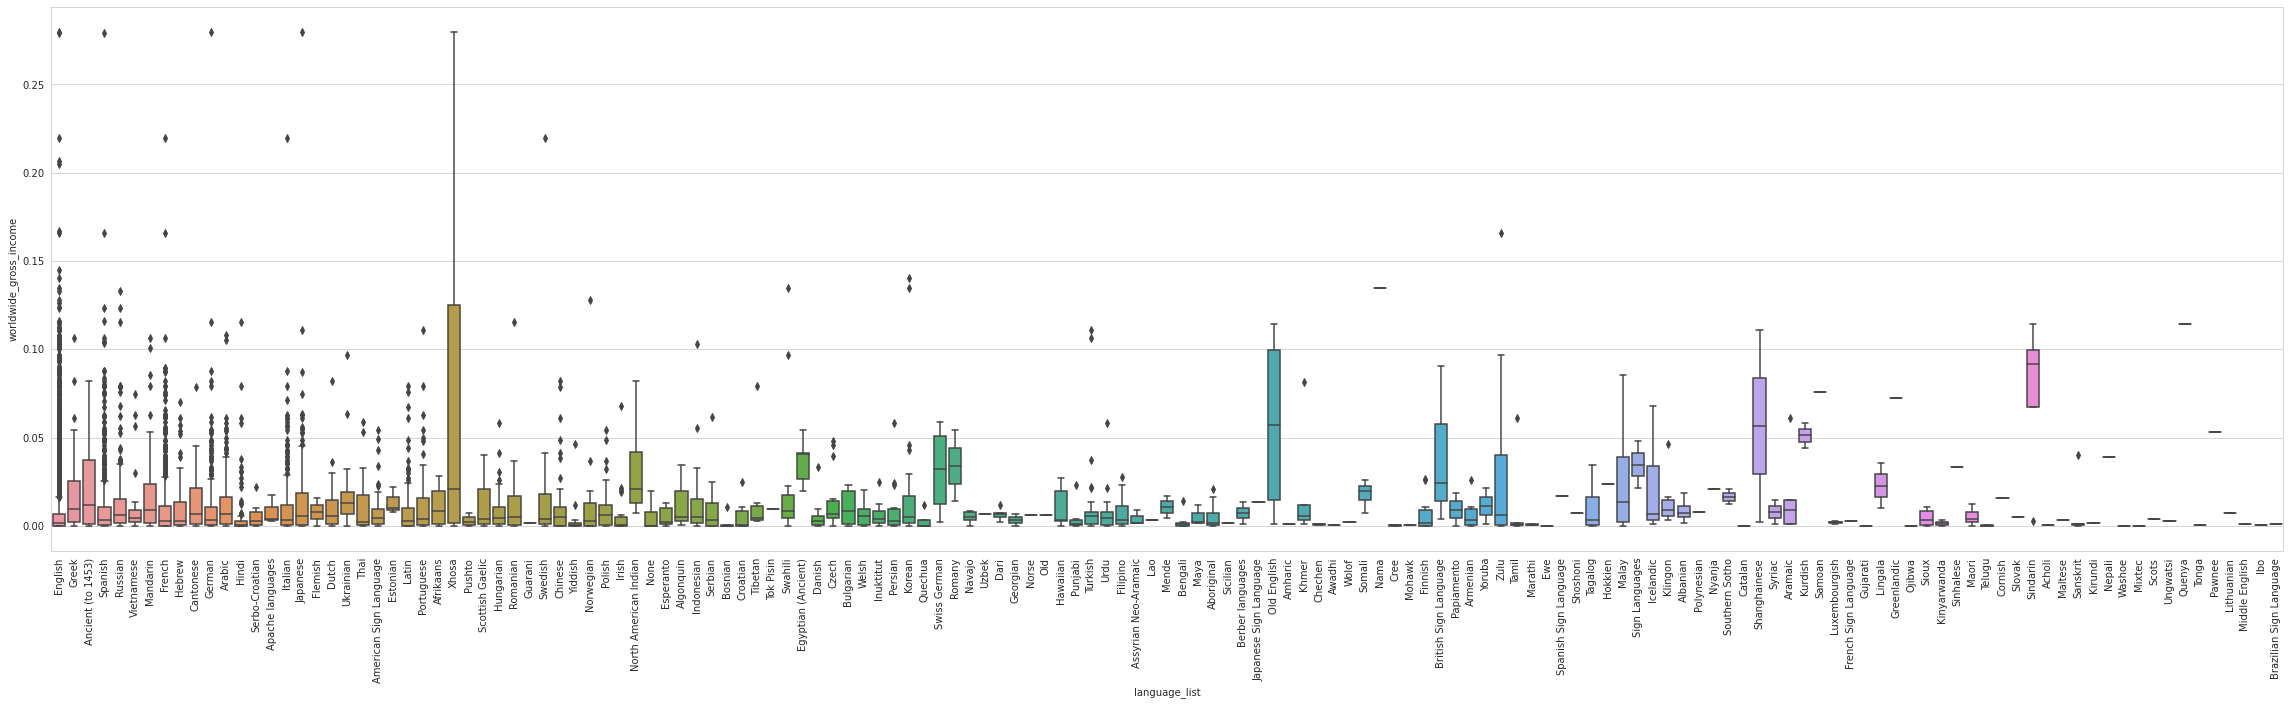

In [ ]:
plt.figure(figsize=(40,10))
plt.xticks(rotation = 'vertical')
sns.boxplot(x = 'language_list', y = 'worldwide_gross_income', data = rating_prefreance_across_language_remove_nan_explode)


analysis
1 Nama language gain hgihest gross incomeand few movies income largest in all languages
2 Quenya language gains second highest gross income
3 English and Xhosa language contains large whiskers and outliers.
4 arkannas language contians large number of movies and mean of income is 0.02 billion
5 old english contains large average values are 0.06 billion.

##6.Earning potential and duration Comparison
 - do the earning of high and low duration movie differ

In [ ]:
# create dataset with feature 'language','worldwide_gross_income'
language_income = imdb_rotten_genre_explode[['language','worldwide_gross_income']].copy()

In [ ]:
language_income

,language,worldwide_gross_income
0,"English, None",0.026916
0,"English, None",0.026916
0,"English, None",0.026916
1,"None, English",0.011233
1,"None, English",0.011233
...,...,...
5346,English,9.341824
5346,English,9.341824
5347,English,13.681524
5347,English,13.681524


In [ ]:
# Convert the languages to list
language_income['language'] = language_income.apply(lambda row:convert_list(row['language']),axis=1)

In [ ]:
# Explode the languages and drop duplicates
language_income = language_income.explode('language') 
language_income.drop_duplicates(inplace=True)


As the number of languages are more so we have to restrict it with selected languages 'English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean'

In [ ]:
language_income= language_income.loc[language_income.language.isin(['English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean'])]

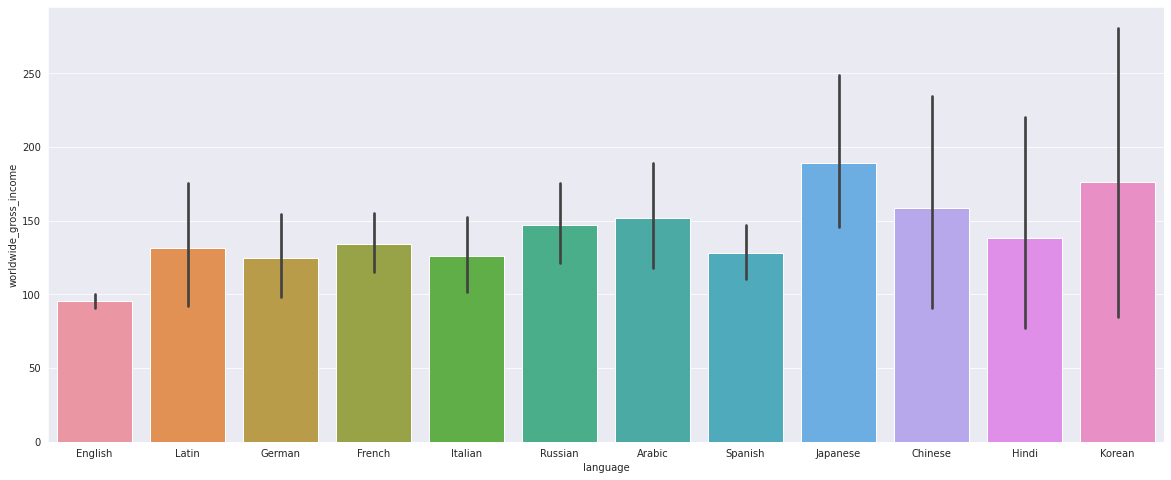

In [ ]:
# plot the barplot for selected languages
plt.figure(figsize=(20,8))
sns.barplot(x='language', y='worldwide_gross_income', data=language_income);

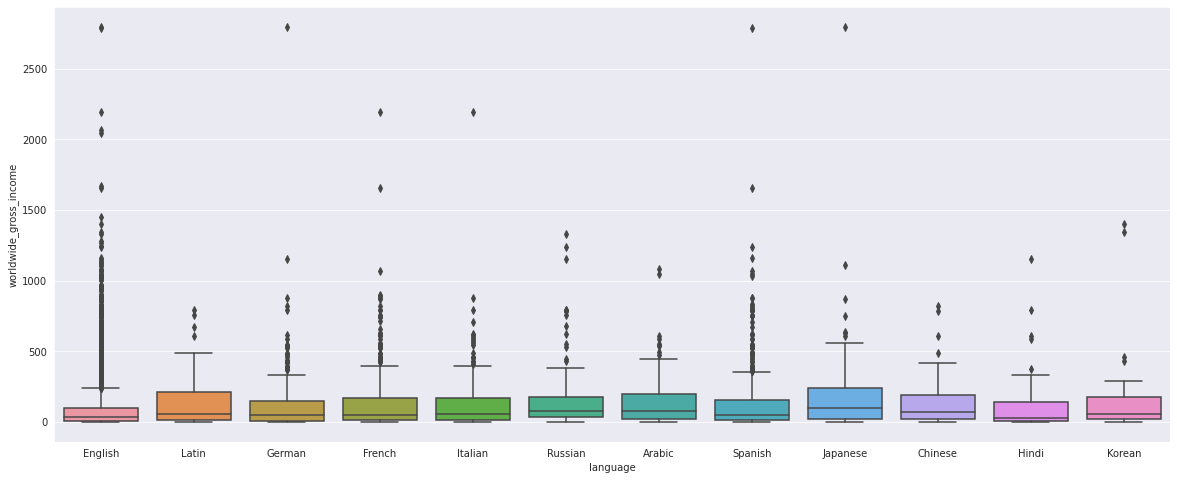

In [ ]:
# plot the boxplot for selected languages
plt.figure(figsize=(20,8))
sns.boxplot(x='language', y='worldwide_gross_income', data=language_income);

**Analysis Point**

1. It is seen that the earnings are more in japanese languages it also have some heavy outliers followed by the korean languages with less outliers.
2. while the earning in english is lowest as compared to other selected languages with too much outliers.

2. **Earning potential and Rating Comparison** -  does movies with higher rating have higher earning potential


In [ ]:
earning_potential_and_imdb_rating_comparision_grp = earning_potential_and_rating_comparision.groupby('imdb_score')['worldwide_gross_income'].mean().reset_index();
earning_potential_and_tomatometer_rating_comparision_grp = earning_potential_and_rating_comparision.groupby('tomatometer_rating')['worldwide_gross_income'].mean().reset_index();

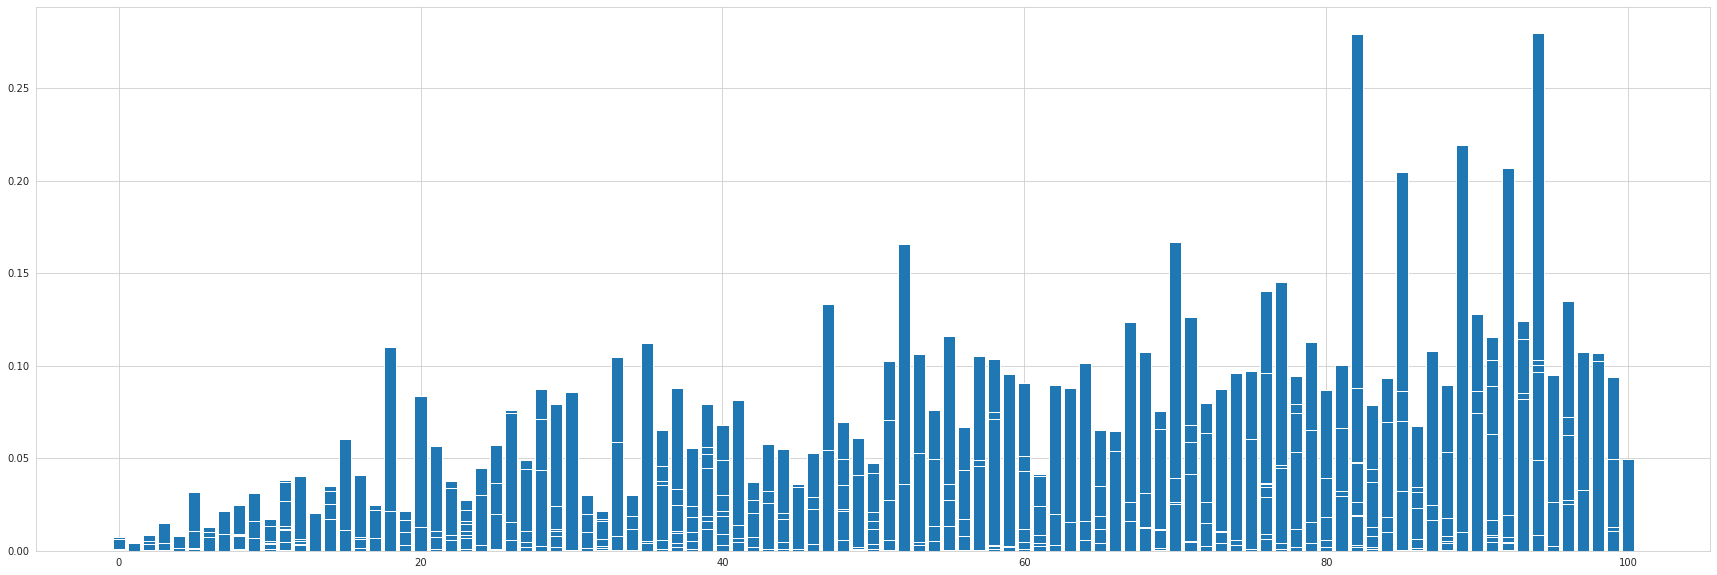

In [ ]:
earning_potential_and_rating_comparision = final_movie_data[['worldwide_gross_income','tomatometer_rating','imdb_score']]
plt.figure(figsize=(30,10))
earning_potential_and_rating_comparision1 = earning_potential_and_rating_comparision['tomatometer_rating'] 
earning_potential_and_rating_comparision3 = earning_potential_and_rating_comparision['worldwide_gross_income']
earning_potential_and_rating_comparision2 = earning_potential_and_rating_comparision['imdb_score']
plt.bar( earning_potential_and_rating_comparision1,earning_potential_and_rating_comparision3);

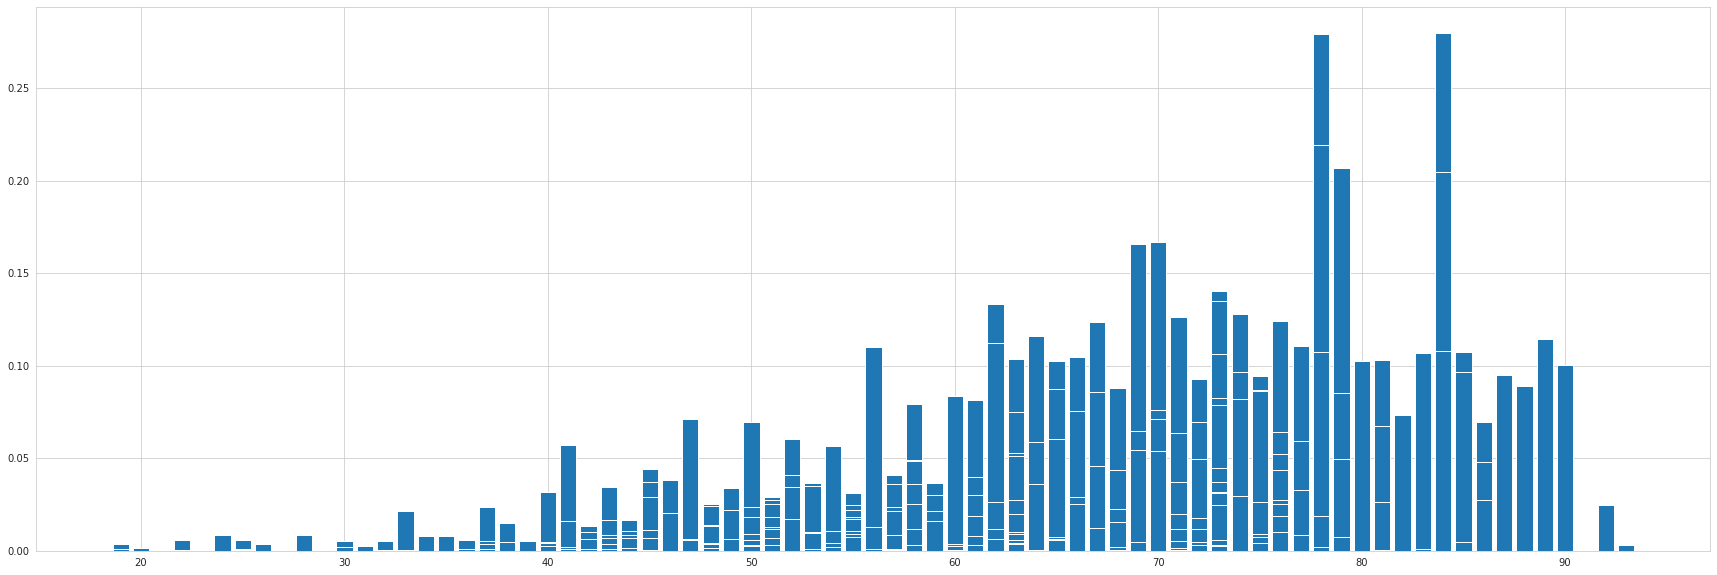

In [ ]:
plt.figure(figsize=(30,10))
plt.bar( earning_potential_and_rating_comparision2,earning_potential_and_rating_comparision3);

Analysis :- 1. Imdb and tomato rating will give higher rating,and simultaneously have worldwide gross income(75 to approximately 90 rating shows higher length of the bar.)
2. tomato meter reding give very strict rating because its a critic rating.
3 60 to 80 rating (both tomato meter rating and imdb ) shows average income(worldwide gross income)

# Final Results

1. We can observe that the most of the IMDB score are in a narrow band of 60 - 70 while most of the rotten tomatoes score lie in a bigger band of 30 - 80.

    This might be due to the fact that audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

    but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

2. Film-noir genre is more preferred in both of the rating system Some genres like Animation, War, Western are equally preferred in both rating system.

3. As times goes on the tomatometer rating declined as compared to imdb_score and vice versa.

4. English language has lowest rating as compared to other languages in both imdb and rottrn tomatoes.

5. The duration is not highly correlated with imdb score and tomatometer rating.

6. Animation genre movies earned higher than other genres.

7. Movies released in japanese language earns more as released in other languages.

8. China has the highest gross income as compared to other countries.

9. History and Drama genre movies are almost around 140 min, which is higher duration compared to other genres.
Animation genre movies has the lowest duration amongst other genres.

10. Throughout years the Drama genre movies are released most i.e. 2682 followed by comedy (2051) compared to others..Throughout 94 years drama genre movies released in 89 years followed by Romance (80) and comedy (77).

11. Over the years the budget increases hence the gross income also increases.
And it is also seen from the correlation matrix that budget and gross income highly correlated with coefficient of 0.74 .
 